In [1]:
#问题描述：构建一个逻辑回归模型来预测，某个学生是否被大学录取。设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。为了完成这个预测任务，我们准备构建一个可以基于两次测试评分来评估录取可能性的分类模型。
#导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#导入数据，查看数据
path="D:\\dataanalyse\\learning_materials\\Machine_learning\\ex2-logistic regression\\ex2data1.txt"
data = pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam 2')

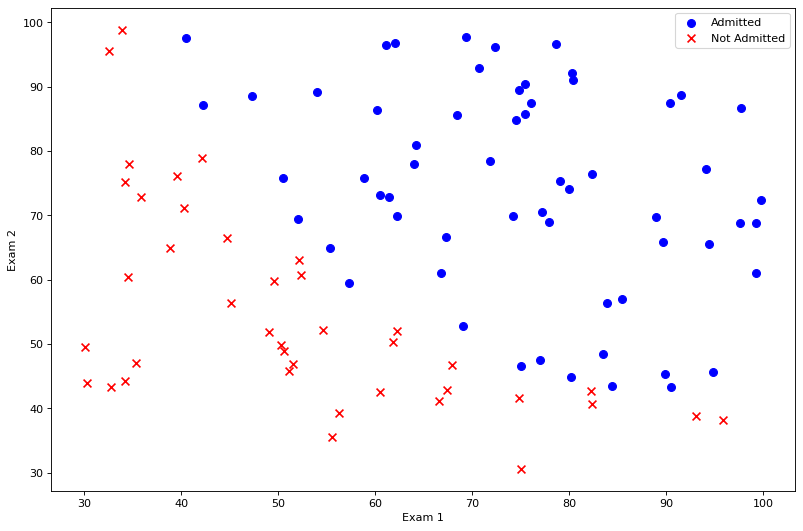

In [8]:
#我们创建两个分数的散点图，并使用颜色编码来可视化，如果样本是正的（被接纳）或负的（未被接纳）。
position = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

plt.figure(figsize=(12,8),dpi=80)
plt.scatter(position['Exam 1'],position['Exam 2'],s=50,c='b',marker='o',label='Admitted')
plt.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
plt.legend()
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
#看起来在两类间，有一个清晰的决策边界。现在我们需要实现逻辑回归，那样就可以训练一个模型来预测结果。方程实现在下面的代码示例在"exercises" 文件夹的 "ex2.pdf" 中。

In [9]:
#sigmoid 函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

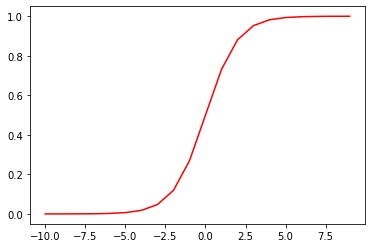

In [11]:
#让我们做一个快速的检查，来确保它可以工作
nums = np.arange(-10,10,1)

plt.plot(nums,sigmoid(nums),c='r')

In [12]:
#编写代价函数来评估结果
def cost(theta,X,y):
    theta= np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    first=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/(len(X))

In [19]:
#做一些初始设置，与练习一相似
# add a ones column - this makes the matrix multiplication work out easier  #how ?
data.insert(0,'Ones',1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

#convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta= np.zeros(3)

In [20]:
#让我们来检查矩阵的维度来确保一切良好。
theta

array([0., 0., 0.])

In [21]:
X.shape,y.shape,theta.shape

((100, 3), (100, 1), (3,))

In [22]:
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [23]:
#计算初始化参数的代价函数(theta为0)。
cost(theta,X,y)

0.6931471805599453

In [26]:
#接下来，我们需要一个函数来计算我们的训练数据、标签和一些参数thata的梯度。
#gradient descent(梯度下降)
def gradient(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X*theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        grad[i]=np.sum(term) / len(X)
        
    return grad

In [27]:
#注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。在练习中，一个称为“fminunc”的Octave函数是用来优化函数来计算成本和梯度参数。由于我们使用Python，我们可以用SciPy的“optimize”命名空间来做同样的事情。
#看看用我们的数据和初始参数为0的梯度下降法的结果。
gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

In [29]:
#现在可以用SciPy's truncated newton（TNC）实现寻找最优参数。
import scipy.optimize as opt
result = opt.fmin_tnc(func = cost,x0 = theta, fprime = gradient ,args=(X,y))
result

(array([-25.16131866,   0.20623159,   0.20147149]), 36, 0)

In [30]:
#看看在这个结论下代价函数计算结果是什么个样子~
cost(result[0],X,y)

0.20349770158947447

In [38]:
#接下来，我们需要编写一个函数，用我们所学的参数theta来为数据集X输出预测。然后，我们可以使用这个函数来给我们的分类器的训练精度打分。 逻辑回归模型的假设函数：当${{h}_{\theta }}$大于等于0.5时，预测 y=1当${{h}_{\theta }}$小于0.5时，预测 y=0 。
def predict(theta, X):
    probability = sigmoid(X * theta.T)   #这就是为什么要加Ones那一列的原因了theta为3*1，且我们默认设置Xo为1
    return [1 if x >= 0.5 else 0 for x in probability]  #写法精辟

In [39]:
#查看分类精确度
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)    
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In [46]:
for (a, b) in zip(predictions, y):
    print(a,b)

0 [0]
0 [0]
0 [0]
1 [1]
1 [1]
0 [0]
1 [1]
0 [1]
1 [1]
1 [1]
1 [0]
0 [0]
1 [1]
1 [1]
0 [0]
1 [1]
0 [1]
0 [0]
1 [1]
1 [1]
0 [0]
1 [1]
0 [0]
0 [0]
1 [1]
1 [1]
1 [1]
1 [0]
0 [0]
0 [0]
1 [1]
1 [1]
0 [0]
0 [1]
0 [0]
0 [0]
1 [0]
1 [1]
0 [0]
0 [0]
1 [1]
0 [0]
1 [1]
1 [0]
0 [0]
0 [0]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
0 [0]
0 [0]
0 [0]
1 [1]
1 [0]
1 [1]
1 [1]
1 [1]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
1 [1]
0 [0]
1 [1]
1 [1]
0 [0]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
0 [0]
1 [0]
1 [1]
1 [1]
1 [1]
0 [1]
1 [1]
1 [1]
0 [0]
1 [1]
1 [1]
0 [0]
1 [1]
1 [1]
0 [0]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
0 [1]
1 [1]


In [64]:
#正则化逻辑回归
#简而言之，正则化是成本函数中的一个术语，它使算法更倾向于“更简单”的模型（在这种情况下，模型将更小的系数）。这个理论助于减少过拟合，提高模型的泛化能力。这样，我们开始吧。
#设想你是工厂的生产主管，你有一些芯片在两次测试中的测试结果。对于这两次测试，你想决定是否芯片要被接受或抛弃。为了帮助你做出艰难的决定，你拥有过去芯片的测试数据集，从其中你可以构建一个逻辑回归模型。
path =  'D:\\dataanalyse\\learning_materials\\Machine_learning\\ex2-logistic regression\\ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


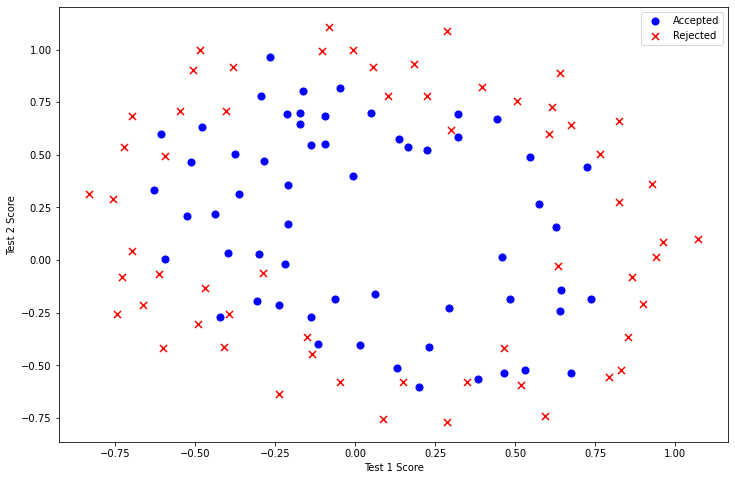

In [65]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [66]:
#这个数据看起来可比前一次的复杂得多。特别地，你会注意到其中没有线性决策界限，来良好的分开两类数据。一个方法是用像逻辑回归这样的线性技术来构造从原始特征的多项式中得到的特征。让我们通过创建一组多项式特征入手吧。
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [73]:
#要修改第一部分的成本和梯度函数，包括正则化项，首先是成本函数
#regularized cost（正则化代价函数）
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg
#请注意等式中的"reg" 项。还注意到另外的一个“学习率”参数。这是一种超参数，用来控制正则化项。现在我们需要添加正则化梯度函数

In [68]:
#修改梯度函数
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [69]:
#初始化变量
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]            #将特征值拿出来
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)           #将数据转化为矩阵。
y2 = np.array(y2.values)
theta2 = np.zeros(11)

In [70]:
#初始学习率到一个合理值，如果有必要的话（即如果惩罚太强或者不够强），我们可以以后折腾这个
learningRate = 1

In [74]:
#让我们尝试调用新的默认为0的theta的正则化函数，以确保计算工作正常
costReg(theta2, X2, y2, learningRate)

0.6931471805599454

In [76]:
gradientReg(theta2, X2, y2, learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [77]:
#现在我们可以使用和第一部分相同的优化函数来计算优化后的结果。
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([ 0.53010247,  0.29075567, -1.60725764, -0.58213819,  0.01781027,
        -0.21329507, -0.40024142, -1.3714414 ,  0.02264304, -0.95033581,
         0.0344085 ]),
 22,
 1)

In [78]:
#最后，我们可以使用第1部分中的预测函数来查看我们的方案在训练数据上的准确度。
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 78%


In [ ]:
#虽然我们实现了这些算法，值得注意的是，我们还可以使用高级Python库像scikit-learn来解决这个问题。
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel()